# Random Forest Pipeline

In [14]:
#importing modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [15]:
#loading train dataset
df_full = pd.read_csv(r"E:\The_Scrapers\Palak_Paneer\titanic_2.csv")
print(df_full.shape)
#df_full.head()

(712, 20)


In [16]:
#breaking down into X and y arrays, removing categorical vars: train
X = df_full.drop(['Survived','Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
y = pd.DataFrame(df_full['Survived'])
print(X.shape)
print(y.shape)
#X.head()

(712, 14)
(712, 1)


In [17]:
#train, dev split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1)

In [18]:
#random forest - main
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

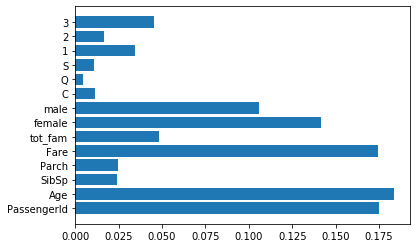

In [19]:
#feature importance
pyplot.barh(X_train.columns, clf.feature_importances_)
pyplot.show()

In [20]:
#prediction y for dev data 
y_pred_dev=clf.predict(X_dev)

In [21]:
y_dev = y_dev['Survived'].to_numpy()
y_dev

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [22]:
confusion_matrix = (metrics.confusion_matrix(y_dev, y_pred_dev, labels=[0,1]))
print(confusion_matrix)

[[37  7]
 [10 18]]


In [23]:
#calculating accuracy and other scores
accuracy_dev = metrics.accuracy_score(y_dev, y_pred_dev)
print('accuracy is: '+ str(accuracy_dev))
precision_dev = metrics.precision_score(y_dev, y_pred_dev)
print(precision_dev)
sensitivity_dev = metrics.recall_score(y_dev, y_pred_dev)
print(sensitivity_dev)
f1_score_dev = metrics.f1_score(y_dev, y_pred_dev)
print(f1_score_dev)

accuracy is: 0.7638888888888888
0.72
0.6428571428571429
0.6792452830188679


## Test pipeline-predicts and creates submission csv

In [61]:
#loading test dataset
df_full_test = pd.read_csv(r"E:\The_Scrapers\Palak_Paneer\test.csv")
print(df_full_test.shape)
#df_full_test.head()

(418, 11)


In [62]:
#making the test data in the same format as X_train
X_test = df_full_test.drop(['Cabin'], axis = 1)
X_test['tot_fam'] = X_test['SibSp'] + X_test['Parch']
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_fam
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2


In [63]:
dummy_sex = pd.get_dummies(X_test['Sex'])
X_test = pd.concat([X_test, dummy_sex], axis=1)

In [64]:
dummy_embark = pd.get_dummies(X_test['Embarked'])
X_test = pd.concat([X_test, dummy_embark], axis=1)
#X_test.head()

In [65]:
dummy_pclass = pd.get_dummies(X_test['Pclass'])
X_test = pd.concat([X_test, dummy_pclass], axis=1)
#X_test.head()

In [66]:
X_test = X_test.drop(['Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
print(X_test.shape)
#X_test.head()

(418, 14)


In [67]:
X_test.rename(columns={1:'Class_1', 2:'Class_2', 3:'Class_3'}, inplace=True)

In [68]:
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'tot_fam', 'female',
       'male', 'C', 'Q', 'S', '1', '2', '3'],
      dtype='object')
Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'tot_fam', 'female',
       'male', 'C', 'Q', 'S', 'Class_1', 'Class_2', 'Class_3'],
      dtype='object')


In [69]:
X_test.PassengerId.isnull().value_counts()

False    418
Name: PassengerId, dtype: int64

In [70]:
#calculates fill rate for columns
fill_rate = {}
for i in X_test:
    null_count = (X_test[i].isna().sum())
    frate = 100-(null_count/len(X_test))*100
    fill_rate[i]=frate

#converts fill rate from dictionary to a dataframe
fillrate_df = pd.DataFrame((fill_rate.items()), columns = ['column_name', 'fill_rate'])
fillrate_df

,column_name,fill_rate
0,PassengerId,100.000000
1,Age,79.425837
2,SibSp,100.000000
3,Parch,100.000000
4,Fare,99.760766
5,tot_fam,100.000000
6,female,100.000000
7,male,100.000000
8,C,100.000000
9,Q,100.000000


In [72]:
#Fill missing obs for Age
print(X_test[(X_test['Class_1'] == 1) & (X_test['male'] == 1)].Age.median())
print(X_test[(X_test['Class_1'] == 1) & (X_test['female'] == 1)].Age.median())
print(X_test[(X_test['Class_2'] == 1) & (X_test['male'] == 1)].Age.median())
print(X_test[(X_test['Class_2'] == 1) & (X_test['female'] == 1)].Age.median())
print(X_test[(X_test['Class_3'] == 1) & (X_test['male'] == 1)].Age.median())
print(X_test[(X_test['Class_3'] == 1) & (X_test['female'] == 1)].Age.median())


42.0
41.0
28.0
24.0
24.0
22.0


In [78]:
for i in X_test.index:
    if X_test[['Age']].iloc[i].isnull().values.any():
        print(X_test.iloc[i])
        #if (X_test[['Class_1']].iloc[i] == 1) & (X_test[['male']].iloc[i] == 1):
            #X_test[['Age']].iloc[i] = 42        

PassengerId    902.0000
Age                 NaN
SibSp            0.0000
Parch            0.0000
Fare             7.8958
tot_fam          0.0000
female           0.0000
male             1.0000
C                0.0000
Q                0.0000
S                1.0000
Class_1          0.0000
Class_2          0.0000
Class_3          1.0000
Name: 10, dtype: float64
PassengerId    914.0000
Age                 NaN
SibSp            0.0000
Parch            0.0000
Fare            31.6833
tot_fam          0.0000
female           1.0000
male             0.0000
C                0.0000
Q                0.0000
S                1.0000
Class_1          1.0000
Class_2          0.0000
Class_3          0.0000
Name: 22, dtype: float64
PassengerId    921.0000
Age                 NaN
SibSp            2.0000
Parch            0.0000
Fare            21.6792
tot_fam          2.0000
female           0.0000
male             1.0000
C                1.0000
Q                0.0000
S                0.0000
Class_1       

In [49]:
X_test.Age.type

AttributeError: 'Series' object has no attribute 'type'

In [20]:
#prediction y for dev data 
y_pred_test=clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [21]:
y_pred_test_df.shape

NameError: name 'y_pred_test_df' is not defined

In [22]:
y_pred_test_df.head()
X_test.head()

NameError: name 'y_pred_test_df' is not defined

In [23]:
X_concat = X_test[['PassengerId']]
X_concat.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [24]:
#creating final submission csv
y_pred_test_df = pd.DataFrame(y_pred_test)
y_pred_test_df.rename(columns = {0:'Survived'},inplace = True)
csv_submission = pd.merge(X_concat,y_pred_test_df, left_index=True, right_index=True)
csv_submission.head()

NameError: name 'y_pred_test' is not defined

In [25]:
csv_submission.PassengerId.isnull().value_counts()

NameError: name 'csv_submission' is not defined

In [26]:
csv_submission.to_csv('csv_submission.csv', index = False)

NameError: name 'csv_submission' is not defined

In [27]:
#automated iteration tracker 
iteration = 
accuracy = upar se
f1_score = 

description = ''



SyntaxError: invalid syntax (<ipython-input-27-23316e610fb5>, line 2)

In [28]:
#grid search for hyper parameter tuning
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined